# AIRBNB ANALYSIS USING PYTHON

### Overview of the Project

This project is based on the analysis of AirBNB dataset in Newyork City, in 2019. 

The project covers areas such as data cleaning, and data visualization.

In [1]:
#Importing of the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing the Airbnb Open dataset
df = pd.read_csv('airbnb.csv')

In [3]:
#Overview of the Data
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [4]:
#Getting the descriptive statistics of the dataset
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
#Getting the dimension of the dataset
print('The AirBNB Dataset has ', df.shape[0],' rows and ',df.shape[1],' columns.')

The AirBNB Dataset has  48895  rows and  16  columns.


In [6]:
#Getting the information about each column of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

It can be seen that in the dataset, there are some columns with missing values. (name, hostname, last_review, reviews_per_month ).

Hence the need for **data cleaning**.

# Data Cleaning

In [7]:
#Checking for duplicate entries
df.duplicated().sum()

0

Duplicates: There are no duplicates entries in the AirBNB dataset.

In [8]:
#Checking for null entries
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
#Dropping columns that are not needed
df.drop(['id', 'name', 'host_name', 'last_review'], axis = 1, inplace = True)

In [10]:
#Checking the dataframe after dropping the columns that are not needed
df.head(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [11]:
#Checking the null entries
df.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
#Replacing Missing Value
df['reviews_per_month'].fillna(0, inplace=True)

In [13]:
#Checking for null entries after data cleaning 
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

From the overview now, it can be clearlty seen that the dataset is now clean.

In [14]:
#Saving the copy of the cleaned dataset as a CSV file
df.to_csv('cleaned_airbnb.csv', index=False)

In [15]:
#Getting the descriptive statistics of the cleaned dataset
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [16]:
#Checking the dimension of the dataset after it has been cleaned
print('Number of Rows: ',df.shape[0],'\nNumber of Columns: ',df.shape[1])

Number of Rows:  48895 
Number of Columns:  12


## Exploratory Data Analysis (EDA)

**1. What is the total number of listing that is available?**

In [17]:
df['host_id'].value_counts().sum()

48895

**2. How many neighbourhood are available in Newyork in 2019?**

In [18]:
len(df['neighbourhood'].unique())

221

**3. What is the total number of listing based on the Room Type?**

In [19]:
room_type_count = df.groupby(['room_type'])['room_type'].count()

In [20]:
room_type_count

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

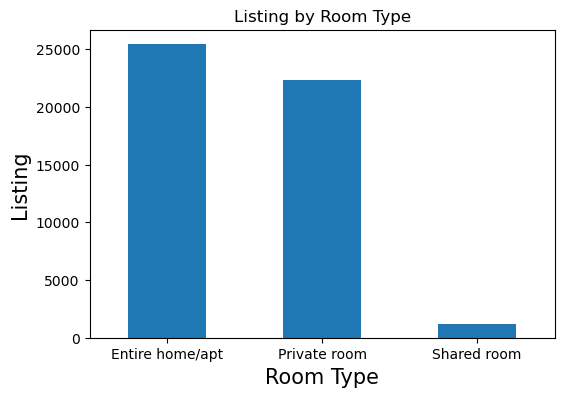

In [21]:
room_type_count.plot(kind='bar', title='Listing by Room Type',figsize=(6,4));
plt.xlabel('Room Type', fontsize = 15);
plt.ylabel('Listing', fontsize = 15);
plt.xticks(rotation=360);

**4. What are the available room type listing in each Neighborhood group?**

In [22]:
neighbourhood_type_count = df.groupby(['neighbourhood_group', 'room_type'])['room_type'].count()

In [23]:
neighbourhood_type_count

neighbourhood_group  room_type      
Bronx                Entire home/apt      379
                     Private room         652
                     Shared room           60
Brooklyn             Entire home/apt     9559
                     Private room       10132
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Entire home/apt     2096
                     Private room        3372
                     Shared room          198
Staten Island        Entire home/apt      176
                     Private room         188
                     Shared room            9
Name: room_type, dtype: int64

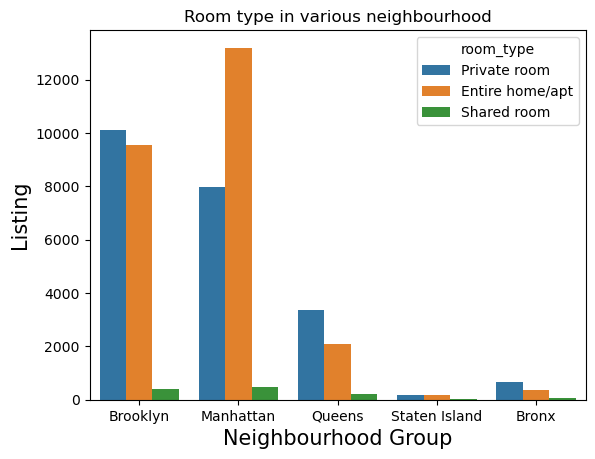

In [24]:
sns.countplot(data=df,x='neighbourhood_group',hue='room_type');
plt.title('Room type in various neighbourhood');
plt.xlabel('Neighbourhood Group', fontsize = 15);
plt.ylabel('Listing', fontsize = 15);

**5. Top 3 Host in AIRBNB in Newyork (2019)**

In [25]:
def top3(column_name):
    top_three = pd.DataFrame(df.groupby([column_name])[column_name].count().sort_values(ascending=False))[:3]
    return top_three

In [26]:
top3('host_id')

,host_id
host_id,
219517861,327
107434423,232
30283594,121


In [27]:
hostNo = df.groupby(['host_id'])['host_id'].count().sort_values(ascending=False)[:3]

In [28]:
hostNo

host_id
219517861    327
107434423    232
30283594     121
Name: host_id, dtype: int64

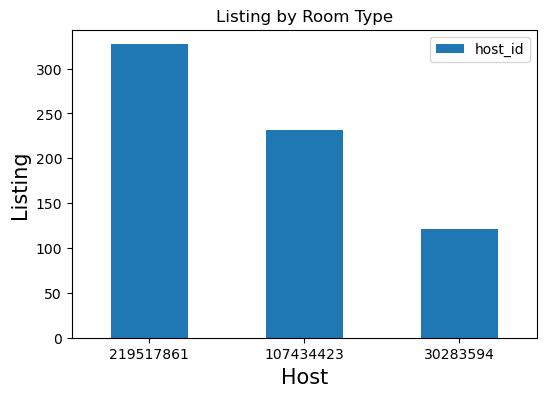

In [29]:
top3('host_id').plot(kind='bar', title='Listing by Room Type',figsize=(6,4));
plt.xlabel('Host', fontsize = 15);
plt.ylabel('Listing', fontsize = 15);
plt.xticks(rotation=360);

**6. Average Listing Price**

In [30]:
avgPrice = np.average(df['price'])

In [31]:
np.round(avgPrice, 2)

152.72

**7. Maximum Listing Price**

In [32]:
maxPrice = df.price.max()

In [33]:
maxPrice

10000

**8. How does the average listing prices of AIRBNB in Newyork varies?**

In [34]:
listingPrice = np.round(df.groupby(['neighbourhood_group'])['price'].mean(), 2).sort_values(ascending=False)

In [35]:
listingPrice

neighbourhood_group
Manhattan        196.88
Brooklyn         124.38
Staten Island    114.81
Queens            99.52
Bronx             87.50
Name: price, dtype: float64

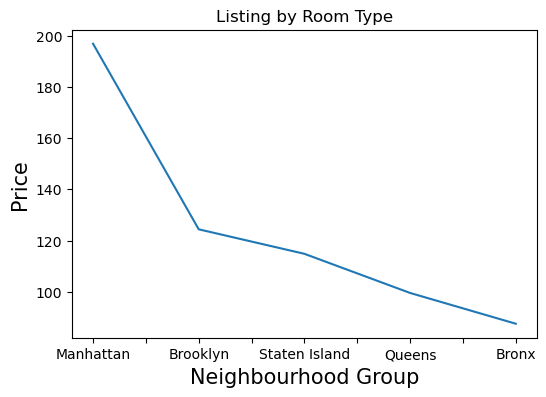

In [36]:
listingPrice.plot(kind='line', title='Listing by Room Type',figsize=(6,4));
plt.xlabel('Neighbourhood Group', fontsize = 15);
plt.ylabel('Price', fontsize = 15);
plt.xticks(rotation=360);

**9. How many days are the Listings in Newyork City opened?**

In [37]:
available_count = np.round(df.groupby(['neighbourhood_group', 'room_type'])['availability_365'].mean()).astype(int)

In [38]:
available_count

neighbourhood_group  room_type      
Bronx                Entire home/apt    158
                     Private room       171
                     Shared room        154
Brooklyn             Entire home/apt     97
                     Private room       100
                     Shared room        178
Manhattan            Entire home/apt    117
                     Private room       102
                     Shared room        139
Queens               Entire home/apt    132
                     Private room       149
                     Shared room        192
Staten Island        Entire home/apt    178
                     Private room       226
                     Shared room         65
Name: availability_365, dtype: int32

In [39]:
x = pd.DataFrame(available_count)

In [40]:
x

availability_365
neighbourhood_group room_type                        
Bronx               Entire home/apt               158
                    Private room                  171
                    Shared room                   154
Brooklyn            Entire home/apt                97
                    Private room                  100
                    Shared room                   178
Manhattan           Entire home/apt               117
                    Private room                  102
                    Shared room                   139
Queens              Entire home/apt               132
                    Private room                  149
                    Shared room                   192
Staten Island       Entire home/apt               178
                    Private room                  226
                    Shared room                    65

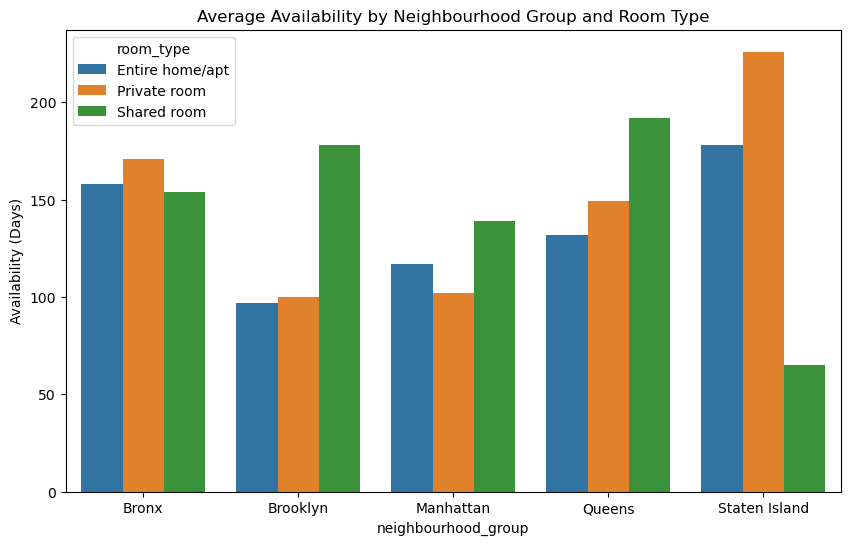

In [41]:
# Convert the result to a DataFrame for easier manipulation
df_available_count = pd.DataFrame(available_count).reset_index()

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the bar chart using Seaborn
sns.barplot(data=df_available_count, x='neighbourhood_group', y='availability_365', hue='room_type')

# Set the y-axis label
plt.ylabel('Availability (Days)')

# Set the chart title
plt.title('Average Availability by Neighbourhood Group and Room Type')

# Display the plot
plt.show()


**10. Map of the AirBNB Listings in different neighbourhood group in New York**

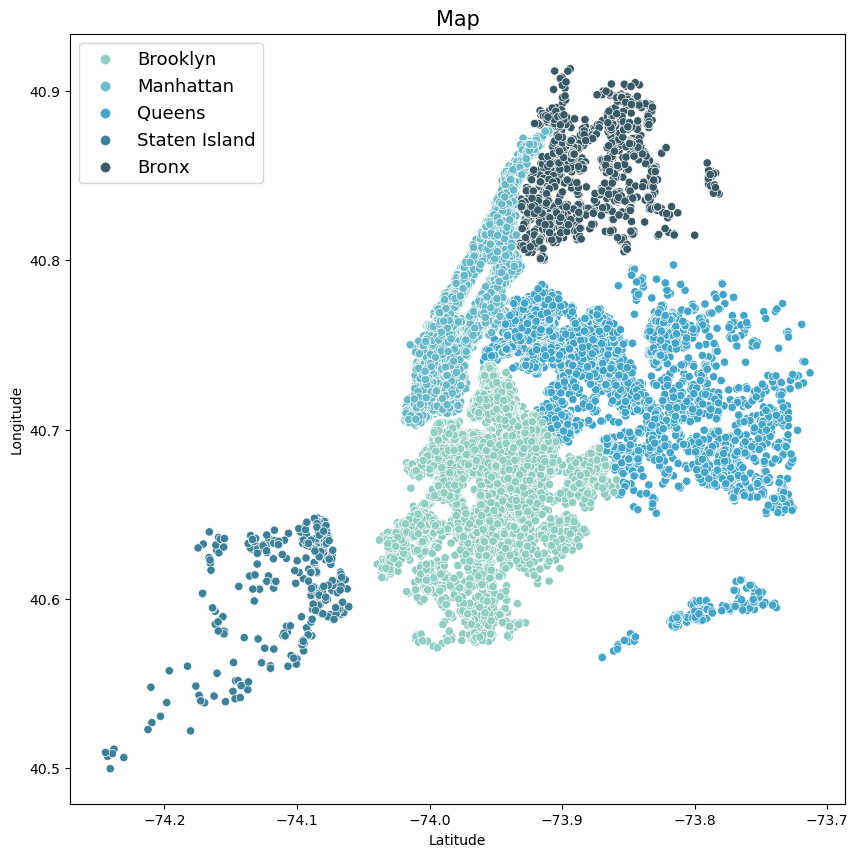

In [42]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x=df.longitude, y=df.latitude, hue=df.neighbourhood_group, palette='GnBu_d')
plt.title('Map', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(fontsize=13)

# Insights From the Analysis

- There are **48895** Listings in Newyork in 2019.

- There are **221** Neighborhoods on AirBNB Listing platform in Newyork in 2019.

- The room types on the platfrom are as follows:

            - Entire home/apt    25409
            - Private room       22326
            - Shared room         1160

Most of the listings on AirBNB platform are Entire home/apt, and there are few shared room compared to the Private room and entire home and apartment.

- The breakdown of the listings based on the room type in the neighborhood group is presented below:

        Bronx        Entire home/apt      379
                     Private room         652
                     Shared room           60
                     
        Brooklyn     Entire home/apt     9559
                     Private room       10132
                     Shared room          413
                     
        Manhattan    Entire home/apt    13199
                     Private room        7982
                     Shared room          480
                     
        Queens       Entire home/apt     2096
                     Private room        3372
                     Shared room          198
                     
        Staten Island Entire home/apt      176
                     Private room         188
                     Shared room            9
                     
Most of the lisitngs in Bronx, Brooklyn, Queens and Staten Island are Private room. While most listings in Manhattan are Entire room/apartment. Shared rooms are not many all through in the neighborhood groups in New York in 2019.

- The top three (3) host on AirBNB platfrom in Newyork in 2019 

         have the 327, 232, and 121 listings respectively.

- The Average Price of Listing in Newyork in 2019 is 

        &#36;152.72 and the highest listing &#36;10000

- The average price of listing of each neighbourhood groups is presented below

         Manhattan        &#36; 196.88
         Brooklyn         &#36; 124.38
         Staten Island    &#36; 114.81
         Queens            &#36; 99.52
         Bronx             &#36; 87.50
- The availability of the each listings in each neighbourhood and room type in a year is presented below

        Bronx        Entire home/apt    158
                     Private room       171
                     Shared room        154
                     
        Brooklyn     Entire home/apt     97
                     Private room       100
                     Shared room        178
                     
        Manhattan    Entire home/apt    117
                     Private room       102
                     Shared room        139
                     
        Queens       Entire home/apt    132
                     Private room       149
                     Shared room        192
                     
        Staten Island Entire home/apt    178
                      Private room       226
                      Shared room         65
                      